In [ ]:
!pip install tenseal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.9 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

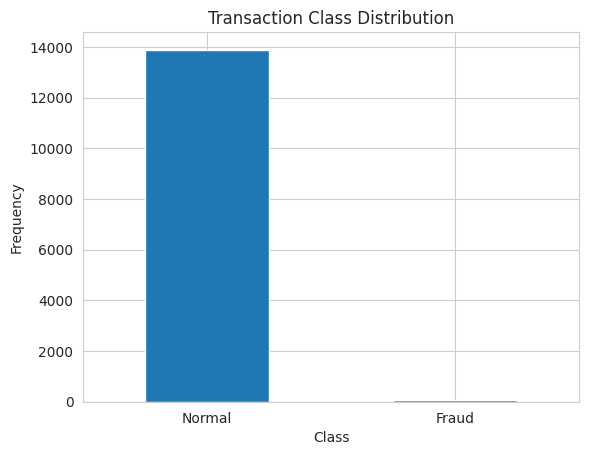

In [ ]:
data.info()
pd.set_option("display.float", "{:.2f}".format)
data.describe()

# check missing values
data.isnull().sum().sum()

data.columns

LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

data.Class.value_counts()


fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

<ipython-input-6-fbdadb6c6053>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)


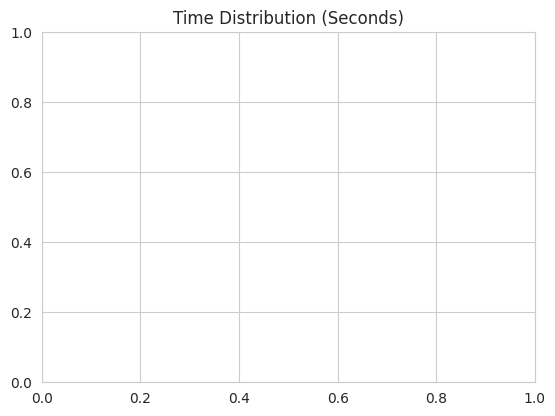

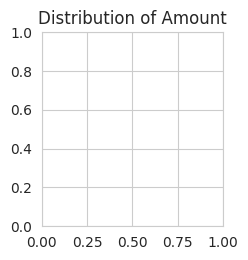

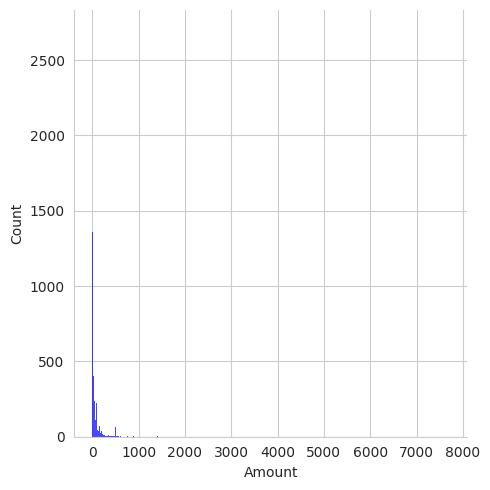

In [ ]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)


pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)


# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.displot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.displot(data['Amount'],color='blue');

In [ ]:
# Data Preprossesing


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v,
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")


Fraudulant transaction weight: 0.0033277870216306157
Non-Fraudulant transaction weight: 0.9966722129783694


In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")



from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
#print_score(y_test, y_test_pred, train=False)

#scores_dict['XGBoost'] = {
#        'Train': f1_score(y_train,y_train_pred),
#        'Test': f1_score(y_test, y_test_pred),
#}

Train Result:
Accuracy Score: 99.99%
_______________________________________________
Classification Report:
              0.0   1.0  accuracy  macro avg  weighted avg
precision    1.00  1.00      1.00       1.00          1.00
recall       1.00  0.96      1.00       0.98          1.00
f1-score     1.00  0.98      1.00       0.99          1.00
support   7787.00 26.00      1.00    7813.00       7813.00
_______________________________________________
Confusion Matrix: 
 [[7787    0]
 [   1   25]]



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [ ]:
from tenseal import context

# Create a TenSEAL context
ctx = context.Context()

# Generate keys
public_key, private_key = ctx.keygen()

AttributeError: ignored

In [ ]:
print(X_train)

print(X_test)

print(y_train)
print(y_test)

[[ 0.66232079  0.81140812 -0.37952676 ... -0.17649046 -0.08269689
  -0.32595771]
 [ 1.53758966  0.87413973 -0.57304421 ...  0.15320343 -0.01805349
  -0.31451856]
 [ 1.82443379 -0.49508314  0.18948897 ... -0.22031715  0.27857626
  -0.37554799]
 ...
 [ 0.55115092  0.85834215 -0.43536726 ... -0.2852291  -0.10368465
  -0.14664126]
 [-0.10785376 -0.14241288  0.40365717 ... -0.56689014 -0.39486591
  -0.27655294]
 [ 1.25384794  0.93994834 -0.59333133 ... -0.08760317 -0.0369172
  -0.32595771]]
[[-1.11717282  0.8256243  -0.08873447 ... -0.07875911  0.07130419
  -0.38228782]
 [ 0.4800539  -1.99433567  0.31795226 ... -0.96058399 -0.5830289
   0.45326505]
 [-0.54309675  0.06264745  0.76234311 ...  0.79494192  0.46992136
  -0.35928584]
 ...
 [-0.60540359  0.754831   -0.7169629  ...  0.07251824  0.00214324
  -0.35842018]
 [-0.17843371 -0.87809612  0.96572524 ...  2.0236834   1.82911206
  -0.3400557 ]
 [-1.28819345 -0.12143246  0.52801558 ...  0.68812313  0.43406897
  -0.34364203]]
10092   0.00
12610

In [ ]:
import torch
import tenseal as ts
import pandas as pd
import random
from time import time

# those are optional and are not necessary for training
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class LR(torch.nn.Module):

    def __init__(self, n_features):
        super(LR, self).__init__()
        self.lr = torch.nn.Linear(n_features, 1)

    def forward(self, x):
        out = torch.sigmoid(self.lr(x))
        return out

In [ ]:
n_features = X_train.shape[1]
model = LR(n_features)
# use gradient descent with a learning_rate=1
optim = torch.optim.SGD(model.parameters(), lr=1)
# use Binary Cross Entropy Loss
criterion = torch.nn.BCELoss()

In [ ]:
# call the classifier and train the data
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(penalty='l2');
clf_logistic.fit(X_train, y_train);

